# Programming for Data Analysis Assignment 2020

## Purpose of numpy.random package
The numpy.random package is used to generate numpy arrays of pseudo-random numbers, i.e., numbers which approximate randomly generated numbers but are generated using non-random means[1], specifically using the Mersenne-Twister algorithm[2]. These are innumerable applications for these numbers in science and mathematics. For instance, in machine learning one is often required to split data into train and test sets and the data has to be chosen randomly.

## Use of Simple random data and Permutations functions
### Simple random data
The Simple random data functions consist of the **integers**, **random**, **choice** and **bytes** functions[3]. 
#### Integers
**integers** returns a list of pseudo-random integers in a certain range and returns the list as a numpy array. The range is defined by a low value and a high value input in the function. For instance, to generate a numpy array of 10 pseudo-random integers between 2 and 5:

In [15]:
# Generator contains methods for generating random numbers, 
# PCG64 (Permuted Congruential Generator 64 bit) 
# is the bit generator for the PCG64 
# pseudo-random generator, SeedSequence generates
# the initial value (seed) for the pseudo
# random number generator
from numpy.random import Generator, PCG64, SeedSequence
# the initial state sg is set
sg = SeedSequence(1234)
# the seed is extracted from the initial state
seed = sg.spawn(0)
# the generator rg is generated using
# PCG64 and the seed
rg = Generator(PCG64(seed)) 
# a list of random integers is generated in the range (2, 5)
integer_list = rg.integers(low=2, high=5, size=10)
print(integer_list)

[4 3 3 2 2 2 2 2 2 4]


#### Random
**random** performs a similar function to **integers** except it returns a numpy array of pseudo-random floats in a certain range rather than integers. For instance, to generate a numpy array of 10 pseudo-random floats between 2 and 5:

In [52]:
float_list = (5-2) *rg.random(10) + 2
print(float_list)

[3.89149295 4.08897639 2.32912156 2.09059708 3.65144222 4.01443498
 2.53360306 2.49396967 2.88232246 3.49206122]


The max and min values for the **random** function are 0 and 1. To get floats between 2 and 5, you have to transform the data using the formula:<br> 
(b-a) rg.random(10) + a <br>
where b is the max value of the range (5 in this instance), a is the min value in the range (2 in this instance). a and b are also floats.

#### Choice
**choice** selects a number of elements from a numpy array in a random order. Elements may be duplicated if the same element is selected more than once randomly. For instance, to randomly select 5 values from a numpy array of the first 10 numbers (0-9):

In [18]:
# get the numpy package to generate
# non-random numbers
import numpy as np
# numpy array of numbers from 0 to 10
ten_list = np.arange(10)
five_list = rg.choice(ten_list, size=5)
print(ten_list, five_list)

[0 1 2 3 4 5 6 7 8 9] [8 1 0 8 0]


#### Bytes
**bytes** returns a string of random bytes. For instance, to generate a string of 10 bytes:

In [19]:
rg.bytes(10)

b'\xd93\x9d\x8a8\x12\x95\x14 \xeb'

### Permutations
#### Shuffle
**shuffle** rearranges an input numpy array randomly. The function does not return a value, instead it rearranges the input array "in-place" (i.e. the original input array is changed). For instance, to randomly rearrange a numpy array of the first 10 numbers (0-9):

In [20]:
ten_list = np.arange(10)
print(ten_list)
rg.shuffle(ten_list)
print(ten_list)

[0 1 2 3 4 5 6 7 8 9]
[4 6 5 2 3 9 7 0 8 1]


#### Permutation
**permutation** is very similar to **shuffle**, except that it does not rearrange the input array in-place, the original input array is unchanged. Instead, it returns a new numpy array which consists of randomly rearranged elements of the input array. For instance, to generate a numpy array of the randomy rearranged numpy array of the first 10 numbers (0-9):

In [21]:
ten_list = np.arange(10)
print(ten_list)
permuted = rg.permutation(ten_list)
print(permuted, ten_list)

[0 1 2 3 4 5 6 7 8 9]
[1 0 4 7 8 6 9 2 3 5] [0 1 2 3 4 5 6 7 8 9]


## Use and purpose of Distributions functions
### Binomial
The Binomial distribution is a discrete-binary probability distribution with only two outcomes: 0 and 1. An experiment is performed n times and the success or failure of each experiment is represented as 0 or 1. The probability of sucess is represented as p and the probability of failure is 1-p. The mean is np (the median and mode are more complicated and have multiple formulae).
The purpose of the **binomial** function is to generate a numpy array of floats using this distribution. For instance, to generate 100000 binomially distributed random numbers with n=1 and p = 0.3333 (note, when n=1 the binomial distribution equals the Bernoulli distribution):

In [22]:
b = rg.binomial(1, 0.3333, size=100000)
print(b)
print(np.mean(b))
print(len(b))

[0 0 1 ... 0 1 1]
0.33349
100000


The **binomial** function returns integers as the binomial distribution is discrete.
A visual representation of **binomials**'s functionality is shown as follows:

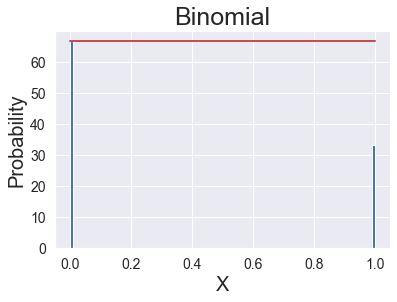

In [62]:
# to generate plots using pyplot from matplotlib
import matplotlib.pyplot as plt
# seaborn makes the plots look nicer
import seaborn as sns

# create grid for pyplots from seaborn
sns.set()

# This creates histogram plots
def plot_hist_of_dist(input_sample, x_label, y_label, dist_name, bins_no, highest_ratio):
    # takes the input sample, number of bins and sets density=True to trace a 
    # good fit for a probability density function to the data.
    count, bins, ignored = plt.hist(input_sample, bins_no, density=True)

    # does plot of bins used in histogram. highest_ratio shows where the
    # highest value of the PDF is.
    plt.plot(bins, highest_ratio*np.ones_like(bins), linewidth=2, color='r')

    # Title of the histogram plot
    plt.title(dist_name, fontsize=25)
    
    # the x label of histogrm
    plt.xlabel(x_label, fontsize=20)
    
    # the y label of histogram
    plt.ylabel(y_label, fontsize=20)
    
    # change size of ticks of x and y axes
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

    # show the plot of bins and histogram plot on same graph
    plt.show()

# show histogram of binomially generated numbers
# 100 bins used to show that all of the values are at
# discrete points 0 and 1. 66.6 is the highest value
# of the probability distribution using 100 bins
plot_hist_of_dist(b, "X", "Probability", "Binomial", 100, 66.6)

Where X is a variable indicating a point along the interval [0,1]. As can be seen from the histogram, approximately 66% of the values are at 0 and 33% are at 1.

### Uniform 
The uniform distribution is a probability distribution where each segment of the interval where the distribution is defined on has equal probability with any other segment of the interval. The mean of the distribution is the midpoint of the interval and equals the median. The mode is any value in the interval.
The purpose of **uniform** is to generate a numpy array of floats using this distribution. For instance, to generate 100000 uniformly distributed random numbers greater than or equal to 2 and less than 5:

In [58]:
u = rg.uniform(2, 5, 100000)
print(u)
# mean and median should equal
print(np.mean(u))
print(np.median(u))
# 100000 number of samples
print(len(u))

[2.82276353 4.55847198 3.77968706 ... 2.02843637 2.58283678 3.7639748 ]
3.5033598408957625
3.5047317193539063
100000


The **uniform** function assumes that the interval between 2 and 5 is continuous, not discrete and returns floats. To generate integers from a discrete interval between 2 and 5, one should use the **integers** function described previously. **uniform** is very similar to the **random** function previously described.
A visual representation of **uniform**'s functionality is shown as follows:

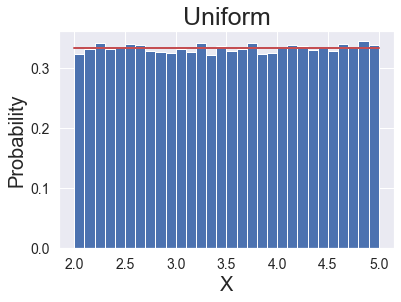

In [63]:
# Generate histogram of uniform distribution. 30 bins, so PDF is divided into 30 segments
# of size 0.1, from 2 to 5. Highest value (mode) is any value in the distribution approx = 0.3333
plot_hist_of_dist(u, "X", "Probability", "Uniform", 30, 0.33333)

Where X is a variable indicating a point along the interval [2,5). As can be seen from the histogram, the probability for each segment (divided here into bins of length 0.1) is approximately equal to the probability for the next segment, and so on for the entirel interval [2,5).
### Normal
The normal distribution is a probability distribution which has a peak around the mean or average value and decreases with distance from the mean. It is symmetric about this mean. In addition, the median (centre) and mode (most common) probability values are identical to the the mean. Approximately 68% of the distribution is located in the interval [mu-sigma, mu+sigma] (where mu is the mean and sigma is the standard deviation), 95% is located in the interval [mu -2sigma, mu+2sigma] and 99.7% is located in the interval [mu-3sigma, mu+3sigma]. 
The purpose of the **normal** function is to generate a numpy array of floats using this distribution. For instance, to generate 10000 normally distributed random numbers between 2 and 5 with mean 2.5 and standard deviation 0.1:

In [64]:
n = np.random.default_rng().normal(2.5, 0.1, 100000)
print(n)
# mean and median should equal
print(np.mean(n))
print(np.median(n))
# number of samples generated
print(len(n))

[2.53651871 2.54768325 2.535859   ... 2.50517029 2.37276458 2.51861804]
2.499632633668946
2.4998513288525457
100000


The **normal** function assumes that the interval between 2 and 5 is continuous, not discrete and returns floats.
A visual representation of **normal**'s functionality is shown as follows:

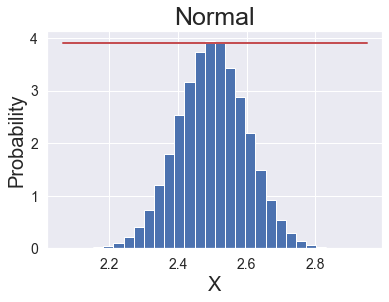

In [65]:
# plot histogram of normally generated numbers, number of bins = 30, highest value (mode) approx = 3.9
plot_hist_of_dist(n, "X", "Probability", "Normal", 30, 3.9)

As can be seen from the histogram, the probability for each segment (divided here into bins of length 0.1) is largest for the mean value X=2.5 and decreases gradually as X becomes smaller or larger than the mean. As X approaches 2.8 and 2.2. the probability becomes very small as 99.7% of the distribution is located in the interval [mu - 3sigma, mu+3sigma] which is [2.2, 2.8]
### Log-normal
The log-normal distribution is a distribution where its natural log (log<sub>e</sub>) is normally distributed. It is a left skewed distribution (i.e. the mode is less than the median which is less than the mean).
The purpose of the **lognormal** function is to generate a numpy array of floats using this distribution. For instance, to generate 10000 normally distributed random numbers between 2 and 5 with mean 2.5 and standard deviation 0.25:

In [66]:
ln = rg.lognormal(2.5, 0.25, 100000)
print(ln)
# mean should be greater than median
print(np.mean(ln))
print(np.median(ln))
# number o samples taken
print(len(n))

[14.16537664 12.3420777  10.52379834 ... 17.17341756  9.6831781
 16.06927342]
12.585639338242952
12.188701014273288
100000


The **lognormal** function assumes that the interval between 2 and 5 is continuous, not discrete and returns floats.
A visual representation of **lognormal**'s functionality is shown as follows:

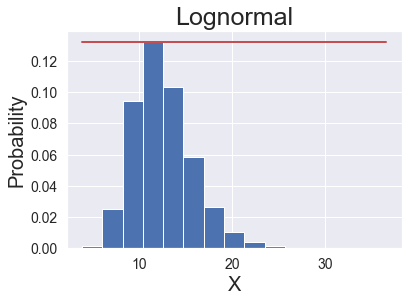

In [68]:
# plot of lognormal distribution, the highest value (mode) is approx 0.132
plot_hist_of_dist(ln, "X", "Probability", "Lognormal", 15, 0.132)

The left-skewed nature of the distribution can be seen from the histogram
### Exponential
The exponential function is a probability distribution which describes the time between events in a process where events happen continuously. The events are independant of each other and occur at a constant average rate.
The purpose of the **exponential** function is to generate a numpy array of floats using this distribution. For instance, to generate 10000 exponentially distributed random numbers with mean 2:

In [111]:
e = rg.exponential(2, size=100000)
print(e)
print(np.mean(e))
print(np.median(e))
print(len(e))

[0.40701006 2.695794   0.54169577 ... 0.70812717 0.84607904 0.33901074]
1.9997474881306931
1.3841394887794118
100000


The **exponential** function assumes continuous not discrete probabilities and returns floats.
A visual representation of **exponetial**'s functionality is shown as follows:

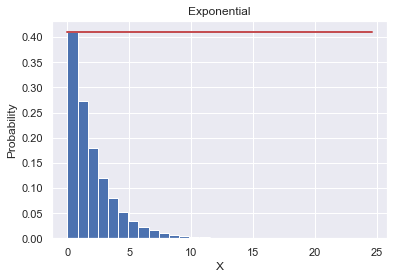

In [118]:
plot_hist_of_dist(e, "X", "Probability", "Exponential", 30, 0.41)

Like the log normal distribution, it is left-skewed as can be seen from the histogram

## Seeds
A seed specifies a starting point in a pattern that a computer uses to generate pseudorandom numbers. The seed is usually taken from the seconds on a computer's clock. This ensures that no two seeds are identical.
An example of a pattern is done using the irrational number pi (3.141592654...). The digits of pi has no regular pattern so is good for pseudorandom number generation. An example pattern acting on pi is take the seed X, add it to 50 and use the (X+50)th digit of pi as the first random number. Than substract 37 from that to get the second number, and so on.
(Note: this is a simple example pattern, in practice computers use more complicated patterns based on the Bernoulli or Poisson distribution).
While no two seeds are identical, they are preset initially when on is generating pseudorandom numbers. This is useful because if one has the seed for a particular set of pseudorandom numbers, they can replicate the exact same set of pseudorandom numbers for testing purposes. For instance, at the start of this Jupyter Notebook the numpy array *integer_list* was generated using the **integers** function. It can be generated again using the generator **rg** which has the same seed:

In [134]:
print(integer_list)
sg = SeedSequence(1234)
seed = sg.spawn(0)
rg = Generator(PCG64(seed)) 
integer_list2 = rg.integers(low=2, high=5, size=10)
print(integer_list)

[4 3 3 2 2 2 2 2 2 4]
[4 3 3 2 2 2 2 2 2 4]


## References
[1] Haahr, M., 2020. RANDOM.ORG - Introduction To Randomness And Random Numbers. [online] Random.org. Available at: <https://www.random.org/randomness/> [Accessed 26 October 2020].<br>
[2] Sicara.ai. 2020. [online] Available at: <https://www.sicara.ai/blog/2019-01-28-how-computer-generate-random-numbers> [Accessed 26 October 2020]. <br>
[3] Numpy.org. 2020. Random Generator — Numpy V1.19 Manual. [online] Available at: <https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator> [Accessed 26 October 2020].